## Objectives
YWBAT
* Slice a dataframe by float values
* Slice a dataframe using standard deviation
* Slice a dataframe using categorical values
* Slice a dataframe on multiple values
* create a new column of float values
* create a categorical column from a float column
* Finding rows based on column values from one more many columns

In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("files/kc1.csv")
df.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,83.0,11.0,1.0,11.0,171.0,927.89,0.04,23.04,40.27,21378.61,...,65,10,6,0,18.0,25.0,107.0,64.0,21.0,True
3,46.0,8.0,6.0,8.0,141.0,769.78,0.07,14.86,51.81,11436.73,...,37,2,5,0,16.0,28.0,89.0,52.0,15.0,True
4,25.0,3.0,1.0,3.0,58.0,254.75,0.11,9.35,27.25,2381.95,...,21,0,2,0,11.0,10.0,41.0,17.0,5.0,True


In [7]:
# There are no null values

In [8]:
df.describe()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,...,2109.00000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000
mean,20.372262,2.838028,1.674443,2.546420,49.829445,258.696719,0.319583,6.771242,21.240071,5242.386240,...,291.24504,14.525367,0.945946,1.759602,0.132764,7.631674,9.537316,31.043717,18.786724,4.665908
std,29.754442,3.900763,2.200659,3.375859,83.599874,516.317605,0.317029,7.863646,21.500367,17444.981211,...,969.16516,24.188302,3.085271,3.856850,0.704023,5.730347,12.195727,51.776056,32.074398,7.792206
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,1.000000,1.000000,1.000000,4.000000,8.000000,0.080000,1.500000,5.330000,12.000000,...,0.67000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,3.000000,1.000000,1.000000
50%,9.000000,1.000000,1.000000,1.000000,16.000000,57.060000,0.200000,3.500000,14.400000,213.970000,...,11.89000,5.000000,0.000000,0.000000,0.000000,6.000000,5.000000,10.000000,6.000000,1.000000
75%,24.000000,3.000000,1.000000,3.000000,58.000000,265.930000,0.670000,9.200000,29.850000,2276.020000,...,126.45000,17.000000,0.000000,2.000000,0.000000,11.000000,13.000000,36.000000,22.000000,5.000000
max,288.000000,45.000000,26.000000,45.000000,1106.000000,7918.820000,2.000000,53.750000,193.060000,324803.510000,...,18044.64000,262.000000,44.000000,58.000000,12.000000,37.000000,120.000000,678.000000,428.000000,89.000000


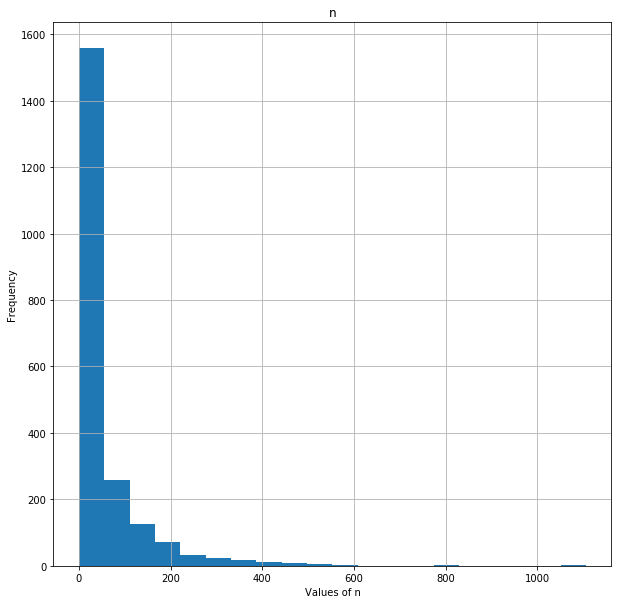

In [18]:
# plot a column as a histogram
df.hist(column='n', figsize=(10, 10), bins=20)
plt.xlabel("Values of n")
plt.ylabel("Frequency")
plt.show()

In [29]:
# How does one create a scaled/normal column for 'n'
n_min = df["n"].min()
n_max = df["n"].max()
n_range = n_max - n_min

# setting scaled value column
n_scaled = []
# loops through each value of the n column
for value in df["n"]:
    #set the new value equal to min max scaled
    new_value = (value-n_min)/n_range
    #appends the new value into n_scaled column
    n_scaled.append(new_value)

In [30]:
df['n_scaled'] = n_scaled
df.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects,n_scaled
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,1.2,1.2,1.2,1.2,1.4,False,0.001175
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1.0,1.0,1.0,1.0,1.0,True,0.000904
2,83.0,11.0,1.0,11.0,171.0,927.89,0.04,23.04,40.27,21378.61,...,10,6,0,18.0,25.0,107.0,64.0,21.0,True,0.154611
3,46.0,8.0,6.0,8.0,141.0,769.78,0.07,14.86,51.81,11436.73,...,2,5,0,16.0,28.0,89.0,52.0,15.0,True,0.127486
4,25.0,3.0,1.0,3.0,58.0,254.75,0.11,9.35,27.25,2381.95,...,0,2,0,11.0,10.0,41.0,17.0,5.0,True,0.052441


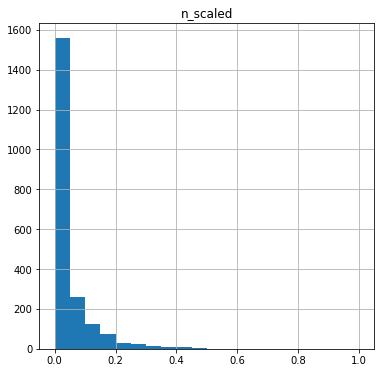

In [31]:
df.hist(column='n_scaled', bins=20, figsize=(6, 6))
plt.show()

In [37]:
# Let's get all columns and rows of the dataframe where n > 0
df_n_g0 = df[df["n"]>0] 

# Let's get all columsn and rows of the dataframe where 0<n<200
df_n_0_200 = df[(df['n']>0) & (df['n']<200)]

In [46]:
# Let's get only the n_column for lOComment value less than 10
# This kinda sucks because it isn't a dataframe
df_maybe = df[df['lOComment']<10]['n']
df_maybe.head()

0      1.3
1      1.0
3    141.0
4     58.0
5    115.0
Name: n, dtype: float64

In [54]:
# turn into dataframe
df_maybe_df = pd.DataFrame(df_maybe)
df_maybe_df.head()

,n
0,1.3
1,1.0
3,141.0
4,58.0
5,115.0


In [55]:
df.head(2)

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects,n_scaled
0,1.1,1.4,1.4,1.4,1.3,1.3,1.3,1.3,1.3,1.3,...,2,2,2,1.2,1.2,1.2,1.2,1.4,False,0.001175
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,1,1,1.0,1.0,1.0,1.0,1.0,True,0.000904


In [57]:
# create a column that adds d and i together
df_di=df['i'] + df['d']
df['di'] = df_di

In [58]:
df.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects,n_scaled,di
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,1.2,1.2,1.2,1.2,1.4,False,0.001175,2.60
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1.0,1.0,1.0,1.0,1.0,True,0.000904,2.00
2,83.0,11.0,1.0,11.0,171.0,927.89,0.04,23.04,40.27,21378.61,...,6,0,18.0,25.0,107.0,64.0,21.0,True,0.154611,63.31
3,46.0,8.0,6.0,8.0,141.0,769.78,0.07,14.86,51.81,11436.73,...,5,0,16.0,28.0,89.0,52.0,15.0,True,0.127486,66.67
4,25.0,3.0,1.0,3.0,58.0,254.75,0.11,9.35,27.25,2381.95,...,2,0,11.0,10.0,41.0,17.0,5.0,True,0.052441,36.60


In [59]:
# let's get all of the values within 3 standard deviations of the mean of the 'v' column

In [66]:
def get_three_sds(df, column):
    upper_limit = df[column].mean() + 3*df[column].std()
    lower_limit = df[column].mean() - 3*df[column].std()
    return df[(df[column]>lower_limit )&(df[column]<upper_limit)]

In [67]:
get_three_sds(df, "d")

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects,n_scaled,di
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,1.2,1.2,1.2,1.2,1.4,False,0.001175,2.60
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1.0,1.0,1.0,1.0,1.0,True,0.000904,2.00
2,83.0,11.0,1.0,11.0,171.0,927.89,0.04,23.04,40.27,21378.61,...,6,0,18.0,25.0,107.0,64.0,21.0,True,0.154611,63.31
3,46.0,8.0,6.0,8.0,141.0,769.78,0.07,14.86,51.81,11436.73,...,5,0,16.0,28.0,89.0,52.0,15.0,True,0.127486,66.67
4,25.0,3.0,1.0,3.0,58.0,254.75,0.11,9.35,27.25,2381.95,...,2,0,11.0,10.0,41.0,17.0,5.0,True,0.052441,36.60
5,43.0,3.0,1.0,3.0,115.0,569.73,0.09,11.27,50.53,6423.73,...,4,0,11.0,20.0,74.0,41.0,5.0,True,0.103978,61.80
6,48.0,6.0,1.0,6.0,149.0,751.61,0.06,15.43,48.72,11596.34,...,2,0,12.0,21.0,95.0,54.0,11.0,True,0.134720,64.15
7,69.0,12.0,1.0,12.0,231.0,1212.27,0.04,27.27,44.45,33061.94,...,2,0,16.0,22.0,156.0,75.0,23.0,True,0.208861,71.72
8,47.0,6.0,1.0,6.0,149.0,745.00,0.06,16.20,45.99,12069.00,...,1,0,12.0,20.0,95.0,54.0,11.0,True,0.134720,62.19
9,48.0,7.0,1.0,7.0,155.0,801.34,0.06,17.82,44.97,14278.39,...,1,0,14.0,22.0,99.0,56.0,13.0,True,0.140145,62.79


In [75]:
df.loc[df["n"]==0, "n"] = 0.0001

(array([ 55.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        104.,  58., 605., 305., 355., 293., 238.,  88.,   8.]),
 array([-9.21034037, -8.39939809, -7.58845582, -6.77751354, -5.96657126,
        -5.15562898, -4.34468671, -3.53374443, -2.72280215, -1.91185987,
        -1.10091759, -0.28997532,  0.52096696,  1.33190924,  2.14285152,
         2.95379379,  3.76473607,  4.57567835,  5.38662063,  6.1975629 ,
         7.00850518]),
 <a list of 20 Patch objects>)

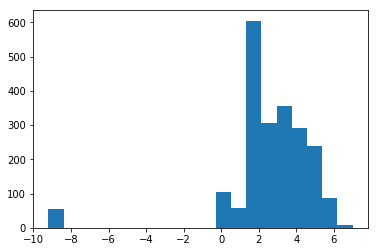

In [80]:
plt.hist(np.log(df.n), bins=20)

In [20]:
import numpy as np
import random

A = np.random.rand(4,4)
B = np.random.rand(4,1)
C = np.random.rand(4,1)

np.equal(A.dot(B+C), A.dot(B) + A.dot(C))

array([[ True],
       [ True],
       [ True],
       [ True]])

In [13]:
x = A.dot(B+C)

In [15]:
ab = A.dot(B)

In [16]:
ac = A.dot(C)

In [17]:
y = ab + ac

In [18]:
x == y

array([[False],
       [False],
       [ True],
       [False]])

In [19]:
print(x)
print(y)

[[1.25142764]
 [2.00630876]
 [2.04254947]
 [1.88461753]]
[[1.25142764]
 [2.00630876]
 [2.04254947]
 [1.88461753]]
